In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

In [6]:
# Read in current version of the df. 
current_df = pd.read_csv('current_features.csv')

y = current_df['target_status']

feature_cols = ['pp_contacts', 'pl_contacts', 'dip_pp_contacts', 'dip_lp_contacts',
       'hyd_lp_contacts', 'Ppep_Nlip_contacts', 'Npep_Plip_contacts']
X = current_df[feature_cols]

# April 22, 2025: playing around

In [17]:
# Split into training and test
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

## Training

In [37]:
clf = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=0)
clf.fit(X_train, y_train)
print(clf.n_iter_)

139


In [43]:
# Print # accuracy and save loss array
accuracy_training = clf.score(X_train, y_train)
print(f"Training Accuracy: {accuracy_training:.2f}")

# Save training loss curve
training_loss_curved = clf.loss_curve_

Training Accuracy: 0.80


## Test set

In [44]:
# Fit test data
clf.fit(X_test, y_test)
print(clf.n_iter_)

# Print # accuracy and save loss array
accuracy_testing = clf.score(X_test, y_test)
print(f"Testing Accuracy: {accuracy_testing:.2f}")
test_loss_curved = clf.loss_curve_


100
Testing Accuracy: 0.80


Text(0, 0.5, 'Loss (Cross Entropy)')

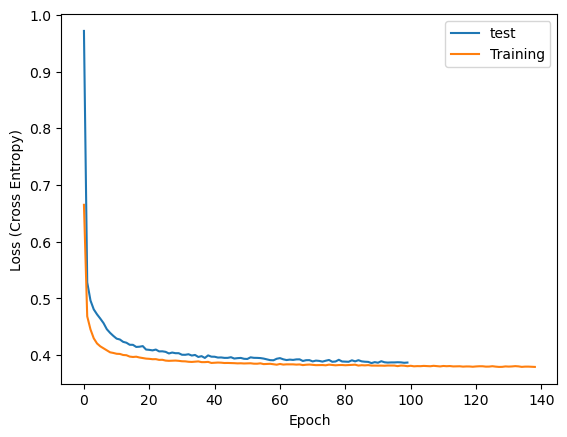

In [45]:
plt.clf()
plt.plot(np.arange(len(test_loss_curved)),test_loss_curved,label='test')
plt.plot(np.arange(len(training_loss_curved)),training_loss_curved,label='Training')
plt.legend()
plt.xlabel('Epoch') # # of iterations basically
plt.ylabel('Loss (Cross Entropy)')


## Make a prediction 

In [47]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92     23394
           1       0.83      0.62      0.71      7236
           2       0.80      0.37      0.51      7256
           3       0.56      0.89      0.69      6437

    accuracy                           0.80     44323
   macro avg       0.77      0.71      0.71     44323
weighted avg       0.82      0.80      0.79     44323



## Check value distribution in df:

how many 0s, 1s etc ...

In [69]:
y.value_counts()/len(y)

target_status
0    0.527559
2    0.163286
1    0.161949
3    0.147205
Name: count, dtype: float64

### Use SMOTE to generate a synthetic sample

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

ModuleNotFoundError: No module named 'imblearn'

## April 23, 2025

Fixing imbalanced data+ employing normalization to determine baseline data fit

In [15]:
# Split into training and test sets
# Stratify keeps the ratio of classes in the split data similar to the original
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                        random_state=0,
                                        stratify=y)   
# Normalize using standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Resample for balanced classes
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)



#### Training

In [27]:
clf = MLPClassifier(hidden_layer_sizes=(25,) *3,
                    max_iter=500, random_state=0)
clf.fit(X_resampled, y_resampled)
print(clf.n_iter_)

172


In [28]:
# Print # accuracy and save loss array
accuracy_training = clf.score(X_resampled, y_resampled)
print(f"Training Accuracy: {accuracy_training:.2f}")

# Save training loss curve
training_loss_curved = clf.loss_curve_

Training Accuracy: 0.75


In [29]:
# Fit test data
clf.fit(X_test_scaled, y_test)
print(clf.n_iter_)

# Print # accuracy and save loss array
accuracy_testing = clf.score(X_test_scaled, y_test)
print(f"Testing Accuracy: {accuracy_testing:.2f}")
test_loss_curved = clf.loss_curve_


149
Testing Accuracy: 0.78


Text(0, 0.5, 'Loss (Cross Entropy)')

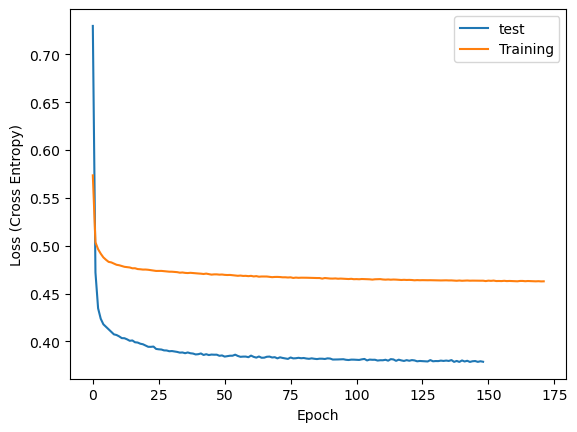

In [30]:
plt.clf()
plt.plot(np.arange(len(test_loss_curved)),test_loss_curved,label='test')
plt.plot(np.arange(len(training_loss_curved)),training_loss_curved,label='Training')
plt.legend()
plt.xlabel('Epoch') # # of iterations basically
plt.ylabel('Loss (Cross Entropy)')
